# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To avoid the warnings so that our notebook looks clean
import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis

In [3]:
# loading data from a csv file to a pandas dataframe
data = pd.read_csv("D:/Softwares/DS/Project/Optimising Agriculture/data.csv")

In [4]:
# checking the shape of the data
print("Shape of the data:", data.shape)

Shape of the data: (2200, 8)


In [5]:
# getting top 5 records of our data
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# cheking if there is any missing value in our data
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
# checking the labels/target variable (crops) present in our data
data['label'].value_counts()

blackgram      100
banana         100
chickpea       100
pomegranate    100
mango          100
maize          100
lentil         100
apple          100
mothbeans      100
coconut        100
coffee         100
pigeonpeas     100
rice           100
jute           100
cotton         100
papaya         100
kidneybeans    100
grapes         100
muskmelon      100
watermelon     100
mungbean       100
orange         100
Name: label, dtype: int64

In [8]:
# Checking average climatic and soil requirement.
# Means we are going to get what is the average requirement for Nitrogen, Phosphorous, Potassium, Temperature, Humidity,
# ph, Rainfall.

print('Average ratio of Nitrogen(N) in the Soil : {0:.2f}'.format(data['N'].mean()))
print('Average ratio of Phosphorous(P) in the Soil : {0:.2f}'.format(data['P'].mean()))
print('Average ratio of Potassium(K) in the Soil : {0:.2f}'.format(data['K'].mean()))
print('Average Temperature in Celsius : {0:.2f}'.format(data['temperature'].mean()))
print('Average Humidity in % : {0:.2f}'.format(data['humidity'].mean()))
print('Average ph in % : {0:.2f}'.format(data['ph'].mean()))
print('Average Rainfall in mm : {0:.2f}'.format(data['rainfall'].mean()))

# above findings can also be seen in the mean value by data.describe() function 

Average ratio of Nitrogen(N) in the Soil : 50.55
Average ratio of Phosphorous(P) in the Soil : 53.36
Average ratio of Potassium(K) in the Soil : 48.15
Average Temperature in Celsius : 25.62
Average Humidity in % : 71.48
Average ph in % : 6.47
Average Rainfall in mm : 103.46


In [9]:
# data.describe()

In [10]:
# checking summary statistics for each of the crops
# here we are going to check the minimum, average and maximum value of N, P, K, Temperature, Humidity, ph, Rainfall for each
# crop using interact keyword. Due to this keyword our function has become intuitive. 
# This can be only done using ipywidgets library.
# Using this functionality we can find soil requirement and climatic condition of any crop given in the data.  
 
@interact
def summary(Crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == Crops]
    print('-------------------------------------------------')
    print('Statistics for Nitrogen :-')
    print('Minimum Nitrogen Required :', x['N'].min())
    print('Average Nitrogen Required :', x['N'].mean())
    print('Maximum Nitrogen Required :', x['N'].max())
    
    print('-------------------------------------------------')
    print('Statistics for Phosphorous :-')
    print('Minimum Phosphorous Required :', x['P'].min())
    print('Average Phosphorous Required :', x['P'].mean())
    print('Maximum Phosphorous Required :', x['P'].max())
    
    print('-------------------------------------------------')
    print('Statistics for Potassium :-')
    print('Minimum Potassium Required :', x['K'].min())
    print('Average Potassium Required :', x['K'].mean())
    print('Maximum Potassium Required :', x['K'].max())
    
    print('-------------------------------------------------')
    print('Statistics for Temperature  :-')
    print('Minimum Temperature Required :', x['temperature'].min())
    print('Average Temperature Required :', x['temperature'].mean())
    print('Maximum Temperature Required :', x['temperature'].max())
    
    print('-------------------------------------------------')
    print('Statistics for Humidity  :-')
    print('Minimum Humidity Required :', x['humidity'].min())
    print('Average Humidity Required :', x['humidity'].mean())
    print('Maximum Humidity Required :', x['humidity'].max())
    
    print('-------------------------------------------------')
    print('Statistics for ph :-')
    print('Minimum ph Required :', x['ph'].min())
    print('Average ph Required :', x['ph'].mean())
    print('Maximum ph Required :', x['ph'].max())
    
    print('-------------------------------------------------')
    print('Statistics for Rainfall :-')
    print('Minimum Rainfall Required :', x['rainfall'].min())
    print('Average Rainfall Required :', x['rainfall'].mean())
    print('Maximum Rainfall Required :', x['rainfall'].max())
    
# (If we select mango crop from the dropdown we can see how our values got updated and also we can see that the temperature
# requirement for mango is very high which suggests that its a summer crop.)

interactive(children=(Dropdown(description='Crops', options=('blackgram', 'banana', 'chickpea', 'pomegranate',…

In [13]:
# function to compare all the crop at once
# comparing the average soil requirement and climatic condition of each crop 

@interact
def compare(Conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print('Average value for' ,Conditions, 'is {0:.2f}'.format(data[Conditions].mean()))
    print('--------------------------------------------------------\n')
    print(' * ', Conditions, 'for all the crops * ')
    print('Rice : {0:.2f}'.format(data[(data['label'] == 'rice')][Conditions].mean()))
    print('Coconut : {0:.2f}'.format(data[(data['label'] == 'coconut')][Conditions].mean()))
    print('Apple : {0:.2f}'.format(data[(data['label'] == 'apple')][Conditions].mean()))
    print('Mango : {0:.2f}'.format(data[(data['label'] == 'mango')][Conditions].mean()))
    print('Mungbean : {0:.2f}'.format(data[(data['label'] == 'mungbean')][Conditions].mean()))
    print('Cotton : {0:.2f}'.format(data[(data['label'] == 'cotton')][Conditions].mean()))
    print('Watermelon : {0:.2f}'.format(data[(data['label'] == 'watermelon')][Conditions].mean()))
    print('Blackgram : {0:.2f}'.format(data[(data['label'] == 'blackgram')][Conditions].mean()))
    print('Grapes : {0:.2f}'.format(data[(data['label'] == 'grapes')][Conditions].mean()))
    print('Maize : {0:.2f}'.format(data[(data['label'] == 'maize')][Conditions].mean()))
    print('Muskmelon : {0:.2f}'.format(data[(data['label'] == 'muskmelon')][Conditions].mean()))
    print('Papaya : {0:.2f}'.format(data[(data['label'] == 'papaya')][Conditions].mean()))
    print('Pomegranate : {0:.2f}'.format(data[(data['label'] == 'pomegranate')][Conditions].mean()))
    print('Mothbeans : {0:.2f}'.format(data[(data['label'] == 'mothbeans')][Conditions].mean()))
    print('Orange : {0:.2f}'.format(data[(data['label'] == 'orange')][Conditions].mean()))
    print('Banana : {0:.2f}'.format(data[(data['label'] == 'banana')][Conditions].mean()))
    print('Pigeonpeas : {0:.2f}'.format(data[(data['label'] == 'pigeonpeas')][Conditions].mean()))
    print('Chickpea : {0:.2f}'.format(data[(data['label'] == 'chickpea')][Conditions].mean()))
    print('Lentil : {0:.2f}'.format(data[(data['label'] == 'lentil')][Conditions].mean()))
    print('Kidneybeans : {0:.2f}'.format(data[(data['label'] == 'kidneybeans')][Conditions].mean()))
    print('Coffee : {0:.2f}'.format(data[(data['label'] == 'coffee')][Conditions].mean()))
    print('Jute : {0:.2f}'.format(data[(data['label'] == 'jute')][Conditions].mean()))

# (In the below dropdown we can see the soil requirement and climatic conditions. 
# If we select rainfall from dropdown it will show us average rainfall for all the crops.
# Also their we can see that some crops require more rainfall whereas some require less.)
# So for this we will again create a function which will tell us that which crop has more & less average than the requirement. 
# This will open up many pattern for us and will let us know that which crop requires unusual soil and climatic condition.

interactive(children=(Dropdown(description='Conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [12]:
# creating a function to check which crop requires more or less average than the requirement

@interact
def compare(Conditions = ['N','P','K','temperature','humidity','ph','rainfall']):
    print('Crops which require more',Conditions, 'than the average',Conditions,'\n')
    print(data[data[Conditions] > data[Conditions].mean()]['label'].unique())
    print('\n-------------------------------------------------------------------------\n')
    print('Crops which require less',Conditions, 'than the average' ,Conditions,'\n')
    print(data[data[Conditions] <= data[Conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='Conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

Text(0.5, 0.98, 'Distribution for Agricultural Condition')

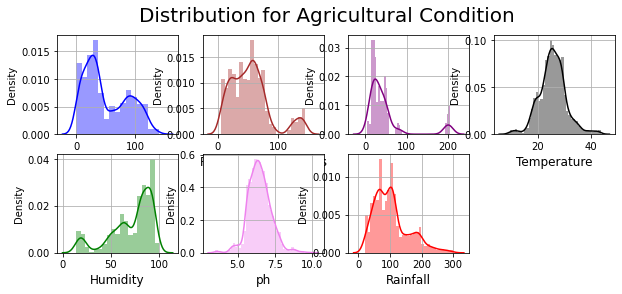

In [13]:
# Lets check the distribution of the soil and climatic conditions for all the different crops present in the data

plt.rcParams['figure.figsize'] = (10,4)

plt.subplot(2,4,1)
#plt.figure(figsize=(3,3))
sns.distplot(data['N'], color = 'blue')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'], color = 'brown')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'], color = 'purple')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'], color = 'green')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['ph'], color = 'violet')
plt.xlabel('ph', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['rainfall'], color = 'red')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Condition', fontsize = 20)
# plt.show()

In [14]:
# using python filtering method to gain some more insights
# So here with the help of distribution plot we have found out min and max threshold and with its help we will filter out data
# So that we will get to know those crops which have unusual requirement

print('Some interesting patterns :-')
print('--------------------------------')
print('Crops which require High Ratio of Nitrogen content in Soil : ', data[data['N'] > 120]['label'].unique())
print('Crops which require High Ratio of Phosphorous content in Soil : ', data[data['P'] > 100]['label'].unique())
print('Crops which require High Ratio of Potassium content in Soil : ', data[data['K'] > 200]['label'].unique())
print('Crops which require High Ratio of Rainfall : ', data[data['rainfall'] > 200]['label'].unique())
print('Crops which require Low Ratio of Temperature : ', data[data['temperature'] < 10]['label'].unique())
print('Crops which require High Ratio of Temperature : ', data[data['temperature'] > 40]['label'].unique())
print('Crops which require Low Ratio of Humidity : ', data[data['humidity'] < 20]['label'].unique())
print('Crops which require Low Ratio of ph : ', data[data['ph'] < 4]['label'].unique())
print('Crops which require High Ratio of ph : ', data[data['ph'] > 9]['label'].unique())

# (As we can see all the intersting patterns below but one is that Mothbeans can be grown in both high and low ph)

Some interesting patterns :-
--------------------------------
Crops which require High Ratio of Nitrogen content in Soil :  ['cotton']
Crops which require High Ratio of Phosphorous content in Soil :  ['grapes' 'apple']
Crops which require High Ratio of Potassium content in Soil :  ['grapes' 'apple']
Crops which require High Ratio of Rainfall :  ['rice' 'papaya' 'coconut']
Crops which require Low Ratio of Temperature :  ['grapes']
Crops which require High Ratio of Temperature :  ['grapes' 'papaya']
Crops which require Low Ratio of Humidity :  ['chickpea' 'kidneybeans']
Crops which require Low Ratio of ph :  ['mothbeans']
Crops which require High Ratio of ph :  ['mothbeans']


In [20]:
# On the basis of temperature,humidity and rainfall we can also find which crops are suitable for the particular season
# This will let us know which crops sould be grown in summer, winter and rainy season

print('Summer Crops')
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print('-------------------------------------------------------------------------')

print('Winter Crops')
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print('-------------------------------------------------------------------------')
print('Rainy Crops')
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())
# print('-------------------------------------------------------------------------')

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [16]:
# Now by using this data we need to find those crops which can be grown in the same soil and climatic condition
# So for this we will use Clustering Analysis
# Clustering Analysis : Its used to classify the data into relative groups that are called clusters, means by doing this we can 
#                       assign similar data points in a single group and in the way we can make different groups.
#                       where the data points of particular group will be very similar to each other.
# Like data points of group 'A' will be very similar to each other and same goes with group 'B' but the data points of group 'A'
# and group 'B' will be very different from each other

In [17]:
# For this we will be using K Means clustering algorithm
from sklearn.cluster import KMeans

# since it is unsupervised learning, the data will only have features
X = data.iloc[:,0:7].values

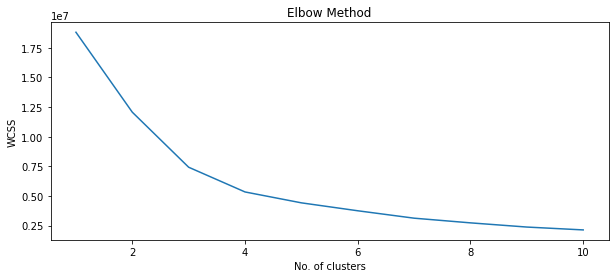

In [18]:
# Now calculating the optimum number of clusters

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_) #calculating wcss for a cluster

#now plotting it to check the k value
plt.plot(range(1,11), wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show() 

# here as we can see that the elbow is formed at 4 and then the value is stagnant so therefore the value of k(cluters) is 4

In [19]:
# Now lets implement the KMeans algorithm to perform clustering analysis

km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0) #some parameters used by KMeans
pred_cluster = km.fit_predict(X) #we have passed fit and predict all at once to features as we dont have label
#print(pred_cluster) #it gives the cluster id : 0,1,2,3

# lets find out the results
a = data['label']
pred_cluster = pd.DataFrame(pred_cluster)
z = pd.concat([pred_cluster, a], axis = 1)
z = z.rename(columns = {0:'Cluster'})
print(z[['Cluster','label']].groupby(['Cluster','label']).size()) # This gives us cluster id along with the respective crops

# print(z[['Cluster','label']].groupby(['Cluster','label']).size().reset_index())


Cluster  label      
0        blackgram      100
         chickpea       100
         coconut          9
         kidneybeans    100
         lentil         100
         maize           24
         mango          100
         mothbeans      100
         mungbean       100
         orange         100
         papaya          29
         pigeonpeas      47
         pomegranate    100
1        banana         100
         coffee          22
         cotton         100
         maize           76
         muskmelon      100
         papaya          19
         watermelon     100
2        apple          100
         grapes         100
3        coconut         91
         coffee          78
         jute           100
         papaya          52
         pigeonpeas      53
         rice           100
dtype: int64


In [20]:
# Checking the cluster for each crop
print('* Lets check the results after applying the K Means Clustering Algorithm * \n')
print('Crop in the first cluster:', z[z['Cluster'] == 0]['label'].unique())
print('--------------------------------------------------------------------------------------')
print('Crop in the second cluster:', z[z['Cluster'] == 1]['label'].unique())
print('--------------------------------------------------------------------------------------')
print('Crop in the third cluster:', z[z['Cluster'] == 2]['label'].unique())
print('--------------------------------------------------------------------------------------')
print('Crop in the fourth cluster:', z[z['Cluster'] == 3]['label'].unique())

# (As here we can see grapes, apple are in same cluster beacuse they exhibit similar properties and so on..)
# (This will help farmers to adopt modern farming also due to this their productivity and profit will increase more.)

* Lets check the results after applying the K Means Clustering Algorithm * 

Crop in the first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------------------------------------------------------
Crop in the second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------------------------------------------------------
Crop in the third cluster: ['grapes' 'apple']
--------------------------------------------------------------------------------------
Crop in the fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [21]:
# Plotting all the clusters

# plt.scatter(X[pred_cluster == 0,0], X[pred_cluster == 0,1], c='red', label='cluster 1')
# plt.scatter(X[pred_cluster == 1,0], X[pred_cluster == 1,1], c='blue', label='cluster2')
# plt.scatter(X[pred_cluster == 2,0], X[pred_cluster == 2,1], c='green', label='cluster3')
# plt.scatter(X[pred_cluster == 3,0], X[pred_cluster == 3,1], c='orange', label='cluster4')

# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='yellow', label='Centroid')

# plt.xlabel('Climatic Condition, Soil Requirement')
# plt.ylabel('Crops')
# plt.title('Cluster of Data Points')
# plt.legend()
# plt.show()


# Predictive Modelling 

In [23]:
# Predicitve Modelling : Here we use our data to create a model, once model is trained we make predictions for the unseen data.
#                        So throughout this process ML model finds all trends and patterns and with the help of them it makes
#                        some decision rule which plays a major role in the final prediction.
# We will check Logistic Regression and XGBoost Classifier for predicive modelling as this both performs well with multiple classes.

# this will let us know the most suitable crop for each specific condition

# Splitting data for predictive modelling

features = data.drop(['label'], axis=1)
labels = data['label']
print('Shape of features', features.shape)
print('Shape of labels', labels.shape)


Shape of features (2200, 7)
Shape of labels (2200,)


In [24]:
# Creating traing and testing set for the validation results

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

print('Shape of features_train', features_train.shape)
print('Shape of features_test', features_test.shape)
print('Shape of labels_train', labels_train.shape)
print('Shape of labels_test', labels_test.shape)


Shape of features_train (1760, 7)
Shape of features_test (440, 7)
Shape of labels_train (1760,)
Shape of labels_test (440,)


In [24]:
# Lets create predictive model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features_train, labels_train)
y_pred = model.predict(features_test)

In [25]:
# Training and Testing Score for the model

print("Training Score:", model.score(features_train, labels_train))
print("Testing Score:", model.score(features_test, labels_test))

Training Score: 0.9664772727272727
Testing Score: 0.9590909090909091


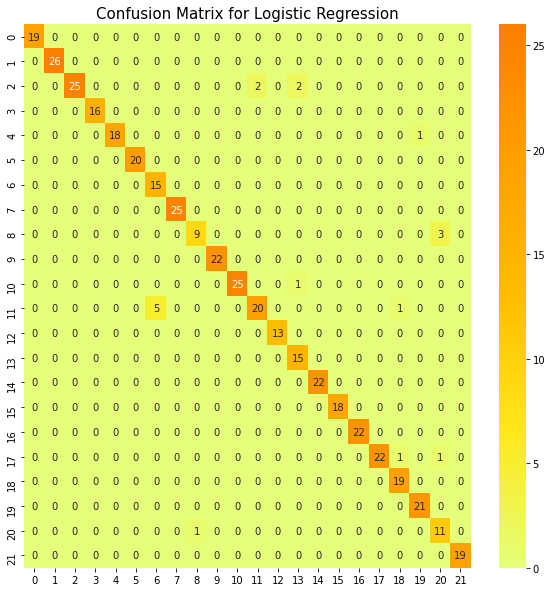

In [26]:
# Lets evaluate model performance

from sklearn.metrics import confusion_matrix

plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(labels_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

In [27]:
# Lets print the classification report
# (This will give us the value for recall and precision. If the value for both is good then our model is also good.)

from sklearn.metrics import classification_report
cr = classification_report(labels_test, y_pred)
print(cr)

# (As we can see for all our crops precision and recall is very high hence we can conclude that our model is so accurate)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        26
   blackgram       1.00      0.86      0.93        29
    chickpea       1.00      1.00      1.00        16
     coconut       1.00      0.95      0.97        19
      coffee       1.00      1.00      1.00        20
      cotton       0.75      1.00      0.86        15
      grapes       1.00      1.00      1.00        25
        jute       0.90      0.75      0.82        12
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      0.96      0.98        26
       maize       0.91      0.77      0.83        26
       mango       1.00      1.00      1.00        13
   mothbeans       0.83      1.00      0.91        15
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        22
      papaya       1.00    

In [21]:
# Using XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier()

In [25]:
xgb.fit(features_train, labels_train)

[14:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
print("Training Score:", xgb.score(features_train, labels_train))
print("Testing Score:", xgb.score(features_test, labels_test))

Training Score: 1.0
Testing Score: 0.9931818181818182


In [27]:
xgb_pred = xgb.predict(features_test)

In [28]:
from sklearn.metrics import classification_report
cr = classification_report(labels_test, xgb_pred)
print(cr)


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        13
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        12
      grapes       1.00      1.00      1.00        25
        jute       0.90      0.95      0.92        19
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        24
       maize       1.00      1.00      1.00        19
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        17
      papaya       1.00    

In [33]:
# Exporting our model into pickle file

import pickle
with open('Agriculture_Logistic_Model.pickle', 'wb') as f:
    pickle.dump(model,f)

import pickle
with open('Agriculture_XGBoost_Model.pickle', 'wb') as f:
    pickle.dump(xgb,f)
     


# (Exporting done)

In [34]:
# Lets do some real time prediction
# By passing soil requirement and climatic condition in our model we will get to know the crop name which is best to grow in 
# those particular soil requirement and climatic condition.

# lets check it for rice
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [42]:
# Prediction using Logisitc Model

# data_for_prediction = [35, 20, 27, 33, 40, 5, 99]
# data_for_prediction = np.array(data_for_prediction)
# data_for_prediction = data_for_prediction.reshape(1,7)
# prediction = model.predict(data_for_prediction)
# print('The suggested Crop for the given Soil Requirement and Climatic Condition is: ', prediction)



The suggested Crop for the given Soil Requirement and Climatic Condition is:  ['mango']


In [46]:
# Prediction using XGBoost

data_for_prediction = [35, 20, 27, 33, 40, 5, 99]
data_for_prediction = np.array(data_for_prediction)
data_for_prediction = data_for_prediction.reshape(1,7)
prediction = xgb.predict(data_for_prediction)
print('The suggested Crop for the given Soil Requirement and Climatic Condition is: ', prediction)


The suggested Crop for the given Soil Requirement and Climatic Condition is:  ['mango']


In [39]:
data[data['label']=='mango'].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.070000,27.180000,29.920000,31.208770,50.156573,5.766373,94.704515
std,12.329037,7.663873,3.096691,2.653858,2.756285,0.703655,3.338577
min,0.000000,15.000000,25.000000,27.003155,45.022364,4.507524,89.291476
25%,9.000000,19.750000,27.000000,28.912489,47.930584,5.183736,91.612674
50%,21.000000,27.500000,30.000000,31.300223,50.281615,5.743385,94.905973
75%,30.250000,35.000000,32.000000,33.382600,52.482812,6.416573,97.475774
max,40.000000,40.000000,35.000000,35.990097,54.964053,6.967418,100.812466


In [44]:
#data[data['label']=='mothbeans']
#data[(data['label'] == 'rice')]

In [60]:
#sns.displot(data, x='rainfall', hue='label', element='step')

In [61]:
# sns.displot(data, x='ph', kind='kde')

In [62]:
# sns.displot(data, x='rainfall', hue = 'label', kind='kde')

In [63]:
#sns.displot(data, x="temperature", hue="label", kind="kde", multiple="stack")

In [64]:
# Bivariate analysis

#sns.displot(data, x='ph', y='rainfall', hue = 'label')

In [65]:
# Plotting pairwise relationship in a data

#sns.pairplot(data)

In [66]:
#sns.pairplot(data, hue='label')

In [67]:
# Plotting climatic condition vs soil requirements

# sns.pairplot(
#     data,
#     x_vars = ['temperature', 'humidity', 'rainfall'],
#     y_vars = ['N', 'P', 'K'],
#             )